In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
Number_of_Grids = 10000
Minimum_Cutoff = 0.001
Maximum_Cutoff = 10.00

In [195]:
r_list = np.linspace(Minimum_Cutoff,Maximum_Cutoff,Number_of_Grids)
print(len(r_list))

10000


In [193]:
r_list[:10]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])

# 定义势函数参数

In [51]:
class ElementPairPotential:
    def __init__(self, pair, A=None, rho=None, C=None, B=None, D=None, n=None, r0=None, charge1=None, charge2=None):
        """
        初始化每个元素对的势函数参数

        Args:
        - pair (str): 元素对名称，例如 "B-O" 或 "O-O"
        - A (float): Buckingham 势的指数项前因子 (eV)
        - rho (float): Buckingham 势的距离参数 (Å)
        - C (float): Buckingham 势的色散项 (eV·Å⁶)
        - B (float): 修正势的幂项前因子 (eV·Åⁿ)
        - D (float): 修正势的平方项前因子 (eV/Å²)
        - n (float): 修正势的幂指数
        - r0 (float): 拼接点 (Å)
        - charge1 (float): 原子 1 的电荷 (单位: e)
        - charge2 (float): 原子 2 的电荷 (单位: e)
        """
        self.pair = pair
        self.A = A
        self.rho = rho
        self.C = C
        self.B = B
        self.D = D
        self.n = n
        self.r0 = r0
        self.charge1 = charge1
        self.charge2 = charge2

    def print_parameters(self):
        """打印参数"""
        print(f"Pair: {self.pair}")
        print(f"  A = {self.A}, rho = {self.rho}, C = {self.C}")
        print(f"  B = {self.B}, D = {self.D}, n = {self.n}")
        print(f"  r0 = {self.r0}, charge1 = {self.charge1}, charge2 = {self.charge2}\n")


In [57]:
# 定义元素对的参数
Para_O_O = ElementPairPotential(
    pair="O-O",
    A=2029.2204,
    rho=0.343645,
    C=192.58,
    B=45.868,
    D=-0.333,
    n=3.402,
    r0=1.903,
    charge1=-1.2,
    charge2=-1.2
)

Para_Si_O = ElementPairPotential(
    pair="Si-O",
    A=13702.9050,
    rho=0.193817,
    C=54.681,
    B=28.950,
    D=-3.059,
    n=3.932,
    r0=1.168,
    charge1=+2.4,
    charge2=-1.2
)

In [59]:
Para_Si_O.print_parameters()

Pair: Si-O
  A = 13702.905, rho = 0.193817, C = 54.681
  B = 28.95, D = -3.059, n = 3.932
  r0 = 1.168, charge1 = 2.4, charge2 = -1.2



In [144]:
(1.602*10**-19)**2/(4*np.pi*8.854*10**-12 )

2.3066178143822714e-28

In [ ]:
8.854187817 × 10-12

In [146]:
1/137.03599

0.007297353053019138

# 定义势函数

In [209]:
def coulomb_potential(r, charge1, charge2):
    """计算库伦势"""
    epsilon_0, e_spot, pi = 8.854187817*(10**-12),1.602176634*(10**-19),np.pi
    if charge1 is None or charge2 is None:
        raise ValueError("Missing charges for Coulomb interaction")
    return (charge1 * charge2 * e_spot**2 ) / (4*pi*epsilon_0*r) 


def buckingham_potential(r, A, rho, C):
    """计算 Buckingham 势"""
    if A is None or rho is None or C is None:
        raise ValueError("Missing Buckingham parameters")
    return A * np.exp(-r / rho) - C / r**6


def correction_potential(r, B, D, n):
    """计算修正势函数"""
    if B is None or D is None or n is None:
        raise ValueError("Missing correction parameters")
    return B / r**n + D * r**2


def combined_potential(r, params):
    """
    计算拼接后的组合势函数，包括库伦项

    Args:
    - r (float): 原子间距离 (Å)
    - params (ElementPairPotential): 元素对的参数实例

    Returns:
    - float: 势能值 (eV)
    """
    # 库伦势
    coulomb = coulomb_potential(r, params.charge1, params.charge2)

    # 判断使用 Buckingham 势或修正势
    if r > params.r0:
        buckingham = buckingham_potential(r, params.A, params.rho, params.C)
        return coulomb + buckingham
    else:
        correction = correction_potential(r, params.B, params.D, params.n)
        return coulomb + correction

In [ ]:
# 变量为 A，C，rho，除此之外还要求Table连续，B和 D是拟合参数



# 根据不同的初始值计算B，D，n

In [231]:
# 常数
epsilon_0, e_spot, pi = 8.854187817*(10**-12),1.602176634*(10**-19),np.pi
k0 = e_spot**2/(4*pi*epsilon_0)
print(k0)

2.3070775512473707e-28


In [233]:
# 截断函数的六个方程
def Teter_potential(r, A, rho, C, charge1, charge2):
    """计算 Buckingham 势的值"""
    Coulomb = (charge1 * charge2 * k0) / r
    Buckingham = A * np.exp(-r / rho) - C / r**6
    return Coulomb + Buckingham

#########
def Teter_derivative_1(r, A, rho, C, charge1, charge2):
    """计算 Buckingham 势的一阶导数"""
    coulomb = -(charge1 * charge2 * k0) /  r**2
    exp_term = -(A / rho) * np.exp(-r / rho)
    dispersion = 6 * C / r**7
    return coulomb + exp_term + dispersion

def Teter_derivative_2(r, A, rho, C,charge1, charge2):
    """计算 Buckingham 势的二阶导数"""
    coulomb = 2 * (charge1 * charge2 * k0) /  r**3
    exp_term = (A / rho**2) * np.exp(-r / rho)
    dispersion = -42 * C / r**8
    return coulomb + exp_term + dispersion

def Correction_function(r, B, D, n):
    """计算修正势的值"""
    return B / r**n + D * r**2

def Correction_derivative_1(r, B, D, n):
    """计算修正势的一阶导数"""
    return -n * B / r**(n + 1) + 2 * D * r

def Correction_derivative_2(r, B, D, n):
    """计算修正势的二阶导数"""
    return n * (n + 1) * B / r**(n + 2) + 2 * D


In [235]:
# 拟合r0

In [273]:
from scipy.optimize import fsolve
import random
# 要求左边近距离大，右边Teter大
def another_judge(A, rho, C, charge1, charge2, r0, B, D, n):
    r_left,r_right = r0-1e-5, r0+1e-5
    compare_left = Teter_potential(r_left, A, rho, C, charge1, charge2) - Correction_function(r_left, B, D, n)
    compare_right = Teter_potential(r_left, A, rho, C, charge1, charge2) - Correction_function(r_right, B, D, n)
    if compare_left<0 and compare_right>0:
        return True
    else:
        return False
# 解方程的主函数
def solve_correction_params(A, rho, C, charge1, charge2, r0_range):
    """
    遍历 r0 的范围，寻找合适的 B, D, n
    """
    results = []
    
    # 遍历 r0 从 0.1 到 5.0
    for r0 in r0_range:
        def equations(variables):
            B, D, n = variables
            # 方程 1：函数值相等
            eq1 = Teter_potential(r0, A, rho, C, charge1, charge2) - Correction_function(r0, B, D, n)
            # 方程 2：一阶导数相等
            eq2 = Teter_derivative_1(r0, A, rho, C, charge1, charge2) - Correction_derivative_1(r0, B, D, n)
            # 方程 3：二阶导数相等
            eq3 = Teter_derivative_2(r0, A, rho, C, charge1, charge2) - Correction_derivative_2(r0, B, D, n)
            return [eq1, eq2, eq3]
        
        # 初始猜测值
        initial_guess = [random.uniform(1, 10), random.uniform(1, 10), random.uniform(1, 10)]  # B, D, n 的初始猜测值
        
        # 使用 fsolve 解方程
        try:
            solution = fsolve(equations, initial_guess, xtol=1e-40)
            B, D, n = solution
            # 检查是否满足物理意义
            if another_judge(A, rho, C, charge1, charge2, r0, B, D, n):
                results.append((r0, B, D, n))
        except RuntimeError:
            # 如果 fsolve 无法收敛，跳过
            continue
    
    return results


# 示例输入参数
A = 13702.9050  # eV
rho = 0.193817  # Å
C = 54.681  # eV·Å^6
charge1 = 2.4  # Si 的部分电荷
charge2 = -1.2  # O 的部分电荷

# r0 的范围
r0_range = np.linspace(1.1, 1.2, 100)

# 计算结果
results = solve_correction_params(A, rho, C, charge1, charge2, r0_range)

# 输出结果
print(len(results))
for r0, B, D, n in results:
    print(f"r0 = {r0:.3f}, B = {B:.5f}, D = {D:.5f}, n = {n:.5f}")

87
r0 = 1.100, B = 31.57716, D = -6.99396, n = 2.62598
r0 = 1.101, B = 31.49003, D = -6.89343, n = 2.64904
r0 = 1.102, B = 31.40511, D = -6.79492, n = 2.67194
r0 = 1.104, B = 31.24165, D = -6.60378, n = 2.71734
r0 = 1.105, B = 31.16301, D = -6.51103, n = 2.73983
r0 = 1.106, B = 31.08637, D = -6.42011, n = 2.76219
r0 = 1.107, B = 31.01168, D = -6.33095, n = 2.78441
r0 = 1.108, B = 30.93890, D = -6.24352, n = 2.80651
r0 = 1.109, B = 30.86797, D = -6.15777, n = 2.82847
r0 = 1.110, B = 30.79886, D = -6.07366, n = 2.85031
r0 = 1.111, B = 30.73153, D = -5.99114, n = 2.87202
r0 = 1.112, B = 30.66593, D = -5.91018, n = 2.89361
r0 = 1.113, B = 30.60202, D = -5.83074, n = 2.91507
r0 = 1.114, B = 30.53978, D = -5.75278, n = 2.93642
r0 = 1.115, B = 30.47916, D = -5.67625, n = 2.95765
r0 = 1.116, B = 30.42013, D = -5.60114, n = 2.97876
r0 = 1.117, B = 30.36265, D = -5.52740, n = 2.99975
r0 = 1.118, B = 30.30670, D = -5.45500, n = 3.02063
r0 = 1.119, B = 30.25223, D = -5.38390, n = 3.04140
r0 = 1.12

C:\Users\81004\AppData\Local\Temp\ipykernel_19656\2686651772.py:36: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  solution = fsolve(equations, initial_guess, xtol=1e-40)
C:\Users\81004\AppData\Local\Temp\ipykernel_19656\2686651772.py:36: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(equations, initial_guess, xtol=1e-40)
C:\Users\81004\AppData\Local\Temp\ipykernel_19656\2686651772.py:36: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  solution = fsolve(equations, initial_guess, xtol=1e-40)


In [257]:
results[0]

(1.014949494949495,
 69.17724663111528,
 -45.137849920847366,
 -0.16613300125885147)

In [275]:
# 示例输入参数
A = 13702.9050  # eV
rho = 0.193817  # Å
C = 54.681  # eV·Å^6
charge1 = 2.4  # Si 的部分电荷
charge2 = -1.2  # O 的部分电荷
######
r0 , B, D , n = results[24]
delta_0 = Teter_potential(r0, A, rho, C, charge1, charge2) - Correction_function(r0, B, D, n)
# 方程 2：一阶导数相等
delta_1 = Teter_derivative_1(r0, A, rho, C, charge1, charge2) - Correction_derivative_1(r0, B, D, n)
# 方程 3：二阶导数相等
delta_2 = eq3 = Teter_derivative_2(r0, A, rho, C, charge1, charge2) - Correction_derivative_2(r0, B, D, n)

print(delta_0,delta_1,delta_2)

1.7763568394002505e-15 0.0 2.842170943040401e-14


# 输出势函数

In [211]:
# 单个距离的计算
r = 0.8
potential = combined_potential(r, Para_Si_O)
print(f"r = {r:.2f} Å, Potential = {potential:.5f} eV")

# 一组距离的计算
r_values = np.linspace(0.5, 2.5, 10000)
potentials = [combined_potential(r, Para_Si_O) for r in r_values]


r = 0.80 Å, Potential = 67.65658 eV


In [213]:
for i,j in zip(r_values,potentials):
   if abs(j)<0.0005:
       print(i)

1.65991599159916


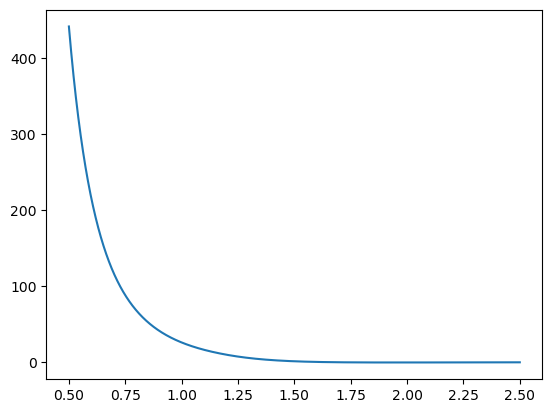

In [215]:
plt.plot(r_values,potentials)
